In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [4]:
# Reading CSV Files
df = pd.read_csv("kc_house_data.csv")

In [5]:
# COlumns list is for interested columns otherwise we can just do df.head
columns= ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']

# Updating Our Data Variable to the columns list
df = df.loc[:, columns]

# Printing Upper 10 Rows
print(df.head(10))

   bedrooms  bathrooms  sqft_living  sqft_lot  floors      price
0         3       1.00         1180      5650     1.0   221900.0
1         3       2.25         2570      7242     2.0   538000.0
2         2       1.00          770     10000     1.0   180000.0
3         4       3.00         1960      5000     1.0   604000.0
4         3       2.00         1680      8080     1.0   510000.0
5         4       4.50         5420    101930     1.0  1225000.0
6         3       2.25         1715      6819     2.0   257500.0
7         3       1.50         1060      9711     1.0   291850.0
8         3       1.00         1780      7470     1.0   229500.0
9         3       2.50         1890      6560     2.0   323000.0


In [7]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']

# X is the Feature Matrix -a two-dimensional grid of data where rows represent samples and columns represent features
X = df.loc[:, features]
# Y is the Target what you want to predict from the data
y = df.loc[:, ['price']]

In [8]:
# Splitting Dataset into Test and Train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = .25)

In [10]:
# Checking Dataset is splitted or not
print("Original Feature Matrix And Target: ", X.shape, y.shape)
print("Train set Feature Matrix And Target: ", X_train.shape, y_train.shape)
print("Test set Feature Matrix And Target: ", X_test.shape, y_test.shape)

Original Feature MAtrix And Target:  (21613, 5) (21613, 1)
Train set Feature Matrix And Target:  (16209, 5) (16209, 1)
Test set Feature Matrix And Target:  (5404, 5) (5404, 1)


In [11]:
# Creating and Training a Model with Scikit-learn

# Import the model you want to use (In scikit-learn, all machine learning models are implemented as Python classes)
from sklearn.tree import DecisionTreeRegressor

In [12]:
# Making an instance of the model
# max_depth is to preprune my tree to make sure it doesn’t have a depth greater than 2
# Random_state is for getting same result if someone executes this program
reg = DecisionTreeRegressor(max_depth = 5, random_state = 0)

In [13]:
# Train the model on the data, storing the information learned from the data.

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [14]:
# Predict labels of Test data
reg.predict(X_test[:10])

array([ 406622.58288211, 1095030.54807692,  406622.58288211,
        406622.58288211,  657115.94280443,  406622.58288211,
        406622.58288211,  657115.94280443,  657115.94280443,
       1095030.54807692])

In [19]:
# There are multiple results of predict so we are checking with one sample
X_test.head(1)

# predict 1 observation.
reg.predict(X_test.iloc[0].values.reshape(1,-1))

C:\Users\devpa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([406622.58288211])

In [20]:
max_depth_range = list(range(1, 25))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth = depth, random_state = 0)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    r2_list.append(score)

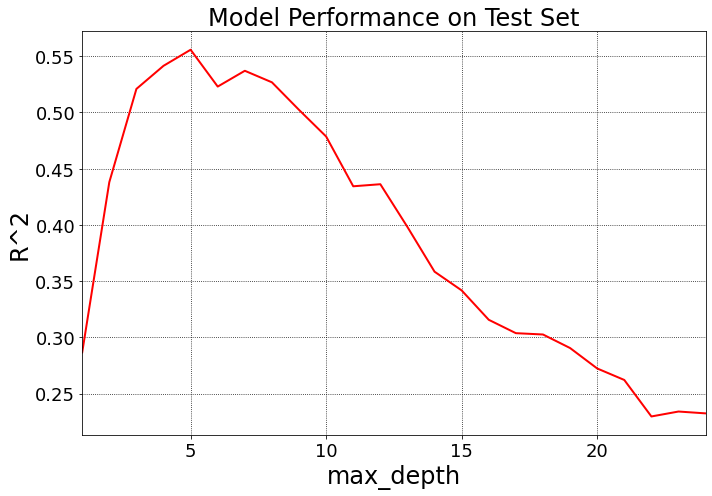

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7), facecolor = 'white');
ax.plot(max_depth_range, r2_list, lw=2, color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True, axis = 'both', zorder = 0, linestyle = ':', color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set', fontsize = 24)
fig.tight_layout()

In [23]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 25))

# List to store the average RMSE for each value of max_depth:
r2_test_list = []

r2_train_list = []

for depth in max_depth_range:
    
    reg = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 0)
    reg.fit(X_train, y_train)    
    
    score = reg.score(X_test, y_test)
    r2_test_list.append(score)
    
    # Bad practice: train and test the model on the same data
    score = reg.score(X_train, y_train)
    r2_train_list.append(score)

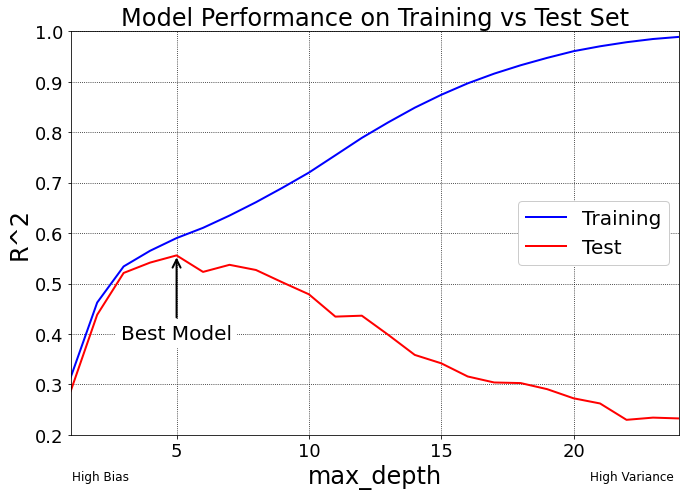

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7), facecolor = 'white');

ax.plot(max_depth_range,
        r2_train_list,
        lw=2,
        color='b',
        label = 'Training')

ax.plot(max_depth_range,
        r2_test_list,
        lw=2,
        color='r',
        label = 'Test')

ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_ylim(.2,1)

ax.legend(loc = 'center right', fontsize = 20, framealpha = 1)
ax.annotate("Best Model",
            xy=(5, 0.5558073822490773), xycoords='data',
            xytext=(5, 0.4), textcoords='data', size = 20,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                            color  = 'black', 
                            lw =  2),
            ha = 'center',
            va = 'center',
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':5}
            )

ax.set_title('Model Performance on Training vs Test Set', fontsize = 24)

# Annotating by figure fraction for ease because i want it outside the plotting area. 
ax.annotate('High Bias',
            xy=(.1, .032), xycoords='figure fraction', size = 12)

ax.annotate('High Variance',
            xy=(.82, .032), xycoords='figure fraction', size = 12)

temp = ax.get_xlim()
temp1 = ax.get_ylim()

fig.tight_layout()
#fig.savefig('images/max_depth_vs_R2_Best_Model.png', dpi = 300)